In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fake_transactional_data_24.csv')

df['not_happened_yet_date']=pd.to_datetime(df['not_happened_yet_date'],format='%d/%m/%Y')
df['year']=df['not_happened_yet_date'].dt.year
df['month']=df['not_happened_yet_date'].dt.month
df['day']=df['not_happened_yet_date'].dt.day

df['from_totally_fake_account']=df['from_totally_fake_account'].astype(int).astype(str)

In [3]:
display(df)
print(df.info())

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,year,month,day
0,10371,4.00,CINEMA,2025-01-01,2025,1,1
1,88339,2.40,40544,2025-01-01,2025,1,1
2,18555,2.40,85149,2025-01-01,2025,1,1
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,2025,1,1
4,80792,1.95,18555,2025-01-01,2025,1,1
...,...,...,...,...,...,...,...
10148275,32185,2.65,COFFEE_SHOP,2025-12-31,2025,12,31
10148276,32185,2.45,COFFEE_SHOP,2025-12-31,2025,12,31
10148277,57569,14.00,WINE_BAR,2025-12-31,2025,12,31
10148278,1490,9.00,57569,2025-12-31,2025,12,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   from_totally_fake_account      object        
 1   monopoly_money_amount          float64       
 2   to_randomly_generated_account  object        
 3   not_happened_yet_date          datetime64[ns]
 4   year                           int64         
 5   month                          int64         
 6   day                            int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 542.0+ MB
None


In [4]:
col_to_exp=df.columns.drop('from_totally_fake_account')
df_sample=(df
           .groupby('from_totally_fake_account')
           .agg(list).sample(n=1)
           .explode(list(col_to_exp))
           .reset_index(drop=True)
           .iloc[:,[0,3,4,5]]
          )
display(df_sample)

,monopoly_money_amount,year,month,day
0,2.65,2025,1,1
1,8.99,2025,1,1
2,4.0,2025,1,2
3,50.0,2025,1,2
4,49.99,2025,1,2
...,...,...,...,...
1241,4.5,2025,12,28
1242,4.5,2025,12,28
1243,5.0,2025,12,29
1244,2.15,2025,12,30


In [5]:
X=df_sample.iloc[:,1:].values
y=df_sample.iloc[:,0].values.reshape(-1,1)

In [6]:
from sklearn.preprocessing import StandardScaler
X_sc=StandardScaler()
y_sc=StandardScaler()
X_train=X_sc.fit_transform(X)
y_train=y_sc.fit_transform(y)

In [7]:
from sklearn.svm import SVR
regrassor=SVR(kernel='rbf')
regrassor.fit(X_train,np.ravel(y_train,order="c"))

SVR()

In [8]:
y_pred=regrassor.predict(X_sc.transform(X))
y_pred=y_sc.inverse_transform(y_pred.reshape(-1,1))

In [9]:
y=y.flatten()
df_result=pd.DataFrame({'Predicted Value':np.ravel(y_pred,order="c"),'Real Value':y})
pd.set_option('display.max_rows',None)  
display(df_result)
pd.reset_option('display.max_rows')  

,Predicted Value,Real Value
0,7.647936,2.65
1,7.647936,8.99
2,7.835443,4.0
3,7.835443,50.0
4,7.835443,49.99
5,7.835443,10.0
6,8.066368,35.0
7,8.066368,2.15
8,8.066368,25.31
9,8.066368,5.0


<Axes: >

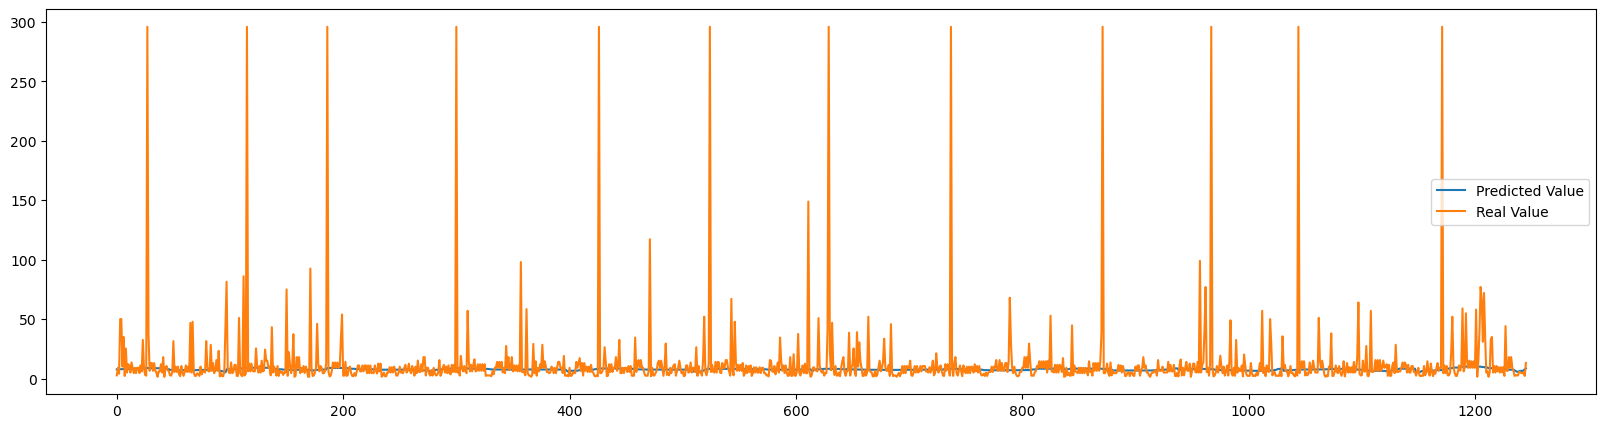

In [10]:
df_result.plot(figsize=(20, 5))

In [14]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2=r2_score(y,y_pred)
rmse=math.sqrt(mean_squared_error(y,y_pred))

print('r2 score: '+str(r2))
print('RMSE: '+str(rmse))

r2 score: -0.023040937212421397
RMSE: 30.930236784265986
